In [37]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_excel as reader
import random
import utm
from geopy.distance import distance as geodis

In [38]:
xl_file = reader("cities.xlsx", engine='openpyxl')
cities = np.array(xl_file["Number"])
name = np.array(xl_file["City"])
lat = np.array(xl_file["lat"])
long = np.array(xl_file["long"])

citylat = np.array([[lat[i], long[i]] for i in range(len(lat))])
cityCoordinates = np.array([np.asarray(utm.from_latlon(lat[i], long[i])[0:2]) for i in range(len(lat))])

#penlty
xl = reader("Book1.xlsx", engine='openpyxl')
adj = np.asarray(xl)[:,1:]
#furirus penalty
for i in range(len(adj)):
    for j in range(len(adj)):
        if adj[i,j] == 9:
            adj[i,j] = adj[i,j] * 100
            
#no penalty
#adj = np.ones((len(cities), len(cities)))

In [39]:
MUTATION_RATE = 40
MUTATION_REPEAT_COUNT = 2
WEAKNESS_THRESHOLD = 7000000000

In [40]:
citySize = len(cityCoordinates)

class Genome():
    chromosomes = []
    fitness = 0

In [41]:
def CreateNewPopulation(size):
    population = []
    for x in range(size):
        newGenome = Genome()
        newGenome.chromosomes = random.sample(range(0, citySize), citySize)
        newGenome.fitness = Evaluate(newGenome.chromosomes)
        population.append(newGenome)
    return population

In [42]:
# Calculate distance between two point
def distance(a, b, ch1, ch2):
    dis = np.sqrt(((a[0] - b[0])**2) + ((a[1] - b[1])**2)) * adj[ch1][ch2]
    return np.round(dis, 2)

In [43]:
def Evaluate(chromosomes):
    calculatedFitness = 0
    for i in range(len(chromosomes) - 1):
        p1 = cityCoordinates[chromosomes[i]]
        p2 = cityCoordinates[chromosomes[i + 1]]
        calculatedFitness += distance(p1, p2, chromosomes[i], chromosomes[i + 1])
    calculatedFitness = np.round(calculatedFitness, 2)
    return calculatedFitness

In [44]:
def findBestGenome(population):
    allFitness = [i.fitness for i in population]
    bestFitness = min(allFitness)
    return population[allFitness.index(bestFitness)]

In [45]:
# In K-Way tournament selection, we select K individuals
# from the population at random and select the best out
# of these to become a parent. The same process is repeated
# for selecting the next parent.
def TournamentSelection(population, k):
    selected = [population[random.randrange(0, len(population))] for i in range(k)]
    bestGenome = findBestGenome(selected)
    return bestGenome

In [46]:
def Reproduction(population):
    parent1 = TournamentSelection(population, 10).chromosomes
    parent2 = TournamentSelection(population, 6).chromosomes
    while parent1 == parent2:
        parent2 = TournamentSelection(population, 6).chromosomes

    return OrderOneCrossover(parent1, parent2)

In [47]:
def OrderOneCrossover(parent1, parent2):
    size = len(parent1)
    child = [-1] * size
    #point = random.randrange(10, size - 15), range(point - 3, point + 12)
    point = 8
    
    for i in range(8, 20):
        child[i] = parent1[i]
    
    j = 0
    for i in range(size):
        while child[i] == -1:
            if parent2[j] in child:
                j += 1 
            else:
                child[i] = parent2[j]
                j +=1
    

    if random.randrange(0, 100) < MUTATION_RATE:
        child = SwapMutation(child)

    # Create new genome for child
    newGenome = Genome()
    newGenome.chromosomes = child
    newGenome.fitness = Evaluate(child)
    return newGenome

In [48]:
def SwapMutation(chromo):
    for x in range(MUTATION_REPEAT_COUNT):
        p1, p2 = [random.randrange(1, len(chromo) - 1) for i in range(2)]
        while p1 == p2:
            p2 = random.randrange(1, len(chromo) - 1)
        log = chromo[p1]
        chromo[p1] = chromo[p2]
        chromo[p2] = log
    return chromo

In [49]:
def GeneticAlgorithm(popSize, maxGeneration):
    allBestFitness = []
    bestchromosomes = []
    population = CreateNewPopulation(popSize)
    generation = 0
    while generation < maxGeneration:
        generation += 1

        for i in range(int(popSize / 2)):
            # Select parent, make crossover and
            # after, append in population a new child
            population.append(Reproduction(population))

        # Kill weakness person
        for genom in population:
            if genom.fitness > WEAKNESS_THRESHOLD:
                population.remove(genom)

        averageFitness = round(np.sum([genom.fitness for genom in population]) / len(population), 2)
        bestGenome = findBestGenome(population)
        print("\n" * 5)
        print("Generation: {0}\nPopulation Size: {1}\t Average Fitness: {2}\nBest Fitness: {3}"
              .format(generation, len(population), averageFitness,
                      bestGenome.fitness))

        allBestFitness.append(bestGenome.fitness)
        bestchromosomes.append(bestGenome.chromosomes)
    return  generation ,allBestFitness, bestchromosomes

In [50]:
gen , allbest , bestgen = GeneticAlgorithm(150, 2000)







Generation: 1
Population Size: 112	 Average Fitness: 11142621795.68
Best Fitness: 7628256151.75






Generation: 2
Population Size: 93	 Average Fitness: 10271602212.11
Best Fitness: 6634060404.91






Generation: 3
Population Size: 84	 Average Fitness: 9158810284.75
Best Fitness: 4888630986.89






Generation: 4
Population Size: 79	 Average Fitness: 8453352797.77
Best Fitness: 4888630986.89






Generation: 5
Population Size: 77	 Average Fitness: 8033722443.55
Best Fitness: 4888630986.89






Generation: 6
Population Size: 76	 Average Fitness: 7598539200.92
Best Fitness: 5301260018.02






Generation: 7
Population Size: 75	 Average Fitness: 7201688044.3
Best Fitness: 5062002309.93






Generation: 8
Population Size: 75	 Average Fitness: 6700881285.43
Best Fitness: 4868033011.96






Generation: 9
Population Size: 75	 Average Fitness: 6469988392.81
Best Fitness: 4868033011.96






Generation: 10
Population Size: 75	 Average Fitness: 6111202108.54
Best Fitness: 4868033011.







Generation: 85
Population Size: 75	 Average Fitness: 4043455528.87
Best Fitness: 2993543945.68






Generation: 86
Population Size: 75	 Average Fitness: 4168803847.13
Best Fitness: 2993543945.68






Generation: 87
Population Size: 75	 Average Fitness: 3898616192.62
Best Fitness: 2993543945.68






Generation: 88
Population Size: 75	 Average Fitness: 4138541011.89
Best Fitness: 2993543945.68






Generation: 89
Population Size: 75	 Average Fitness: 4147989820.39
Best Fitness: 2712370491.22






Generation: 90
Population Size: 75	 Average Fitness: 4152129988.45
Best Fitness: 2712370491.22






Generation: 91
Population Size: 75	 Average Fitness: 4003616888.42
Best Fitness: 2712370491.22






Generation: 92
Population Size: 75	 Average Fitness: 3850493522.84
Best Fitness: 2712370491.22






Generation: 93
Population Size: 75	 Average Fitness: 3465718301.13
Best Fitness: 2712370491.22






Generation: 94
Population Size: 75	 Average Fitness: 3616435752.57
Best Fitness: 2712







Generation: 166
Population Size: 75	 Average Fitness: 3632471107.08
Best Fitness: 2638186511.57






Generation: 167
Population Size: 75	 Average Fitness: 3759177351.94
Best Fitness: 2638186511.57






Generation: 168
Population Size: 75	 Average Fitness: 3830903985.39
Best Fitness: 2638186511.57






Generation: 169
Population Size: 75	 Average Fitness: 3942307482.1
Best Fitness: 2638186511.57






Generation: 170
Population Size: 75	 Average Fitness: 3853258993.1
Best Fitness: 2638186511.57






Generation: 171
Population Size: 75	 Average Fitness: 3790956486.6
Best Fitness: 2638186511.57






Generation: 172
Population Size: 75	 Average Fitness: 3728512143.42
Best Fitness: 2638186511.57






Generation: 173
Population Size: 75	 Average Fitness: 3924772838.24
Best Fitness: 2638186511.57






Generation: 174
Population Size: 75	 Average Fitness: 3894212103.89
Best Fitness: 2638186511.57






Generation: 175
Population Size: 75	 Average Fitness: 3669774897.37
Best Fitnes







Generation: 250
Population Size: 75	 Average Fitness: 3456116595.37
Best Fitness: 2620604992.27






Generation: 251
Population Size: 75	 Average Fitness: 3553845207.4
Best Fitness: 2620604992.27






Generation: 252
Population Size: 75	 Average Fitness: 3672009786.75
Best Fitness: 2620604992.27






Generation: 253
Population Size: 75	 Average Fitness: 3778416211.71
Best Fitness: 2620604992.27






Generation: 254
Population Size: 75	 Average Fitness: 3481842041.61
Best Fitness: 2620604992.27






Generation: 255
Population Size: 75	 Average Fitness: 3441079161.62
Best Fitness: 2620604992.27






Generation: 256
Population Size: 75	 Average Fitness: 3351647678.2
Best Fitness: 2620604992.27






Generation: 257
Population Size: 75	 Average Fitness: 3634769109.89
Best Fitness: 2620604992.27






Generation: 258
Population Size: 75	 Average Fitness: 3743374801.5
Best Fitness: 2620604992.27






Generation: 259
Population Size: 75	 Average Fitness: 3825280763.44
Best Fitnes







Generation: 331
Population Size: 75	 Average Fitness: 3478639246.87
Best Fitness: 2620604992.27






Generation: 332
Population Size: 75	 Average Fitness: 3817767521.32
Best Fitness: 2620604992.27






Generation: 333
Population Size: 75	 Average Fitness: 3672656189.59
Best Fitness: 2620604992.27






Generation: 334
Population Size: 75	 Average Fitness: 3713154870.33
Best Fitness: 2620604992.27






Generation: 335
Population Size: 75	 Average Fitness: 3596844140.6
Best Fitness: 2620604992.27






Generation: 336
Population Size: 75	 Average Fitness: 3417644439.16
Best Fitness: 2620604992.27






Generation: 337
Population Size: 75	 Average Fitness: 3482498625.48
Best Fitness: 2620604992.27






Generation: 338
Population Size: 75	 Average Fitness: 3448802832.43
Best Fitness: 2620604992.27






Generation: 339
Population Size: 75	 Average Fitness: 3672101817.5
Best Fitness: 2620604992.27






Generation: 340
Population Size: 75	 Average Fitness: 3776774455.45
Best Fitne







Generation: 415
Population Size: 75	 Average Fitness: 3439943296.11
Best Fitness: 2620604992.27






Generation: 416
Population Size: 75	 Average Fitness: 3406276456.22
Best Fitness: 2620604992.27






Generation: 417
Population Size: 75	 Average Fitness: 3220974008.48
Best Fitness: 2620604992.27






Generation: 418
Population Size: 75	 Average Fitness: 3360661359.85
Best Fitness: 2620604992.27






Generation: 419
Population Size: 75	 Average Fitness: 3520381507.46
Best Fitness: 2620604992.27






Generation: 420
Population Size: 75	 Average Fitness: 3362832758.49
Best Fitness: 2620604992.27






Generation: 421
Population Size: 75	 Average Fitness: 3495768385.43
Best Fitness: 2620604992.27






Generation: 422
Population Size: 75	 Average Fitness: 3479227237.06
Best Fitness: 2620604992.27






Generation: 423
Population Size: 75	 Average Fitness: 3765705818.31
Best Fitness: 2620604992.27






Generation: 424
Population Size: 75	 Average Fitness: 3958431323.88
Best Fit







Generation: 498
Population Size: 75	 Average Fitness: 3244564244.3
Best Fitness: 2433719940.11






Generation: 499
Population Size: 75	 Average Fitness: 3323970269.1
Best Fitness: 2433719940.11






Generation: 500
Population Size: 75	 Average Fitness: 3248940639.68
Best Fitness: 2433719940.11






Generation: 501
Population Size: 75	 Average Fitness: 3161291025.21
Best Fitness: 2433719940.11






Generation: 502
Population Size: 75	 Average Fitness: 3196924830.29
Best Fitness: 2433719940.11






Generation: 503
Population Size: 75	 Average Fitness: 3270744652.58
Best Fitness: 2433719940.11






Generation: 504
Population Size: 75	 Average Fitness: 3186836188.06
Best Fitness: 2433719940.11






Generation: 505
Population Size: 75	 Average Fitness: 3279022479.72
Best Fitness: 2433719940.11






Generation: 506
Population Size: 75	 Average Fitness: 3251220043.21
Best Fitness: 2433719940.11






Generation: 507
Population Size: 75	 Average Fitness: 3472398778.52
Best Fitne







Generation: 582
Population Size: 75	 Average Fitness: 3301506526.6
Best Fitness: 2291047683.86






Generation: 583
Population Size: 75	 Average Fitness: 3422002106.91
Best Fitness: 2291047683.86






Generation: 584
Population Size: 75	 Average Fitness: 3196612286.9
Best Fitness: 2291047683.86






Generation: 585
Population Size: 75	 Average Fitness: 3238785147.41
Best Fitness: 2291047683.86






Generation: 586
Population Size: 75	 Average Fitness: 3281868114.67
Best Fitness: 2291047683.86






Generation: 587
Population Size: 75	 Average Fitness: 3141802090.6
Best Fitness: 2291047683.86






Generation: 588
Population Size: 75	 Average Fitness: 3122716461.19
Best Fitness: 2291047683.86






Generation: 589
Population Size: 75	 Average Fitness: 3212605842.6
Best Fitness: 2291047683.86






Generation: 590
Population Size: 75	 Average Fitness: 3226132158.31
Best Fitness: 2291047683.86






Generation: 591
Population Size: 75	 Average Fitness: 3461225303.25
Best Fitness







Generation: 666
Population Size: 75	 Average Fitness: 3653260985.71
Best Fitness: 2262207094.01






Generation: 667
Population Size: 75	 Average Fitness: 3641977380.3
Best Fitness: 2262207094.01






Generation: 668
Population Size: 75	 Average Fitness: 3385062965.45
Best Fitness: 2262207094.01






Generation: 669
Population Size: 75	 Average Fitness: 3105819906.77
Best Fitness: 2262207094.01






Generation: 670
Population Size: 75	 Average Fitness: 3200119113.48
Best Fitness: 2262207094.01






Generation: 671
Population Size: 75	 Average Fitness: 3270489515.67
Best Fitness: 2262207094.01






Generation: 672
Population Size: 75	 Average Fitness: 3026403976.31
Best Fitness: 2262207094.01






Generation: 673
Population Size: 75	 Average Fitness: 3213749217.02
Best Fitness: 2262207094.01






Generation: 674
Population Size: 75	 Average Fitness: 3030297220.84
Best Fitness: 2262207094.01






Generation: 675
Population Size: 75	 Average Fitness: 3088433579.73
Best Fitn







Generation: 750
Population Size: 75	 Average Fitness: 3267562713.89
Best Fitness: 2262207094.01






Generation: 751
Population Size: 75	 Average Fitness: 3397440841.45
Best Fitness: 2262207094.01






Generation: 752
Population Size: 75	 Average Fitness: 3457402442.35
Best Fitness: 2262207094.01






Generation: 753
Population Size: 75	 Average Fitness: 3277129263.81
Best Fitness: 2262207094.01






Generation: 754
Population Size: 75	 Average Fitness: 3226143829.04
Best Fitness: 2262207094.01






Generation: 755
Population Size: 75	 Average Fitness: 3072506383.9
Best Fitness: 2262207094.01






Generation: 756
Population Size: 75	 Average Fitness: 3173442171.9
Best Fitness: 2262207094.01






Generation: 757
Population Size: 75	 Average Fitness: 3073145400.15
Best Fitness: 2262207094.01






Generation: 758
Population Size: 75	 Average Fitness: 2970816782.78
Best Fitness: 2262207094.01






Generation: 759
Population Size: 75	 Average Fitness: 2987469576.14
Best Fitne







Generation: 834
Population Size: 75	 Average Fitness: 3281644955.66
Best Fitness: 2092281932.18






Generation: 835
Population Size: 75	 Average Fitness: 3372234919.52
Best Fitness: 2092281932.18






Generation: 836
Population Size: 75	 Average Fitness: 3101246909.28
Best Fitness: 2092281932.18






Generation: 837
Population Size: 75	 Average Fitness: 2913362127.22
Best Fitness: 2092281932.18






Generation: 838
Population Size: 75	 Average Fitness: 3173505158.62
Best Fitness: 2092281932.18






Generation: 839
Population Size: 75	 Average Fitness: 3123923200.9
Best Fitness: 2092281932.18






Generation: 840
Population Size: 75	 Average Fitness: 3066681484.7
Best Fitness: 2092281932.18






Generation: 841
Population Size: 75	 Average Fitness: 2946456358.63
Best Fitness: 2092281932.18






Generation: 842
Population Size: 75	 Average Fitness: 3126810912.01
Best Fitness: 2092281932.18






Generation: 843
Population Size: 75	 Average Fitness: 3114956882.28
Best Fitne







Generation: 918
Population Size: 75	 Average Fitness: 3074870245.0
Best Fitness: 2092281932.18






Generation: 919
Population Size: 75	 Average Fitness: 2878590592.65
Best Fitness: 2092281932.18






Generation: 920
Population Size: 75	 Average Fitness: 3032296409.73
Best Fitness: 2092281932.18






Generation: 921
Population Size: 75	 Average Fitness: 3110429911.15
Best Fitness: 2092281932.18






Generation: 922
Population Size: 75	 Average Fitness: 3066005462.22
Best Fitness: 2092281932.18






Generation: 923
Population Size: 75	 Average Fitness: 3334230214.24
Best Fitness: 2092281932.18






Generation: 924
Population Size: 75	 Average Fitness: 3082693734.44
Best Fitness: 2092281932.18






Generation: 925
Population Size: 75	 Average Fitness: 2999521091.82
Best Fitness: 2092281932.18






Generation: 926
Population Size: 75	 Average Fitness: 3149873784.59
Best Fitness: 2092281932.18






Generation: 927
Population Size: 75	 Average Fitness: 2816437115.82
Best Fitn







Generation: 1004
Population Size: 75	 Average Fitness: 3099940059.47
Best Fitness: 2092281932.18






Generation: 1005
Population Size: 75	 Average Fitness: 2982741682.59
Best Fitness: 2092281932.18






Generation: 1006
Population Size: 75	 Average Fitness: 3272758384.71
Best Fitness: 2092281932.18






Generation: 1007
Population Size: 75	 Average Fitness: 3093335470.2
Best Fitness: 2092281932.18






Generation: 1008
Population Size: 75	 Average Fitness: 2945766072.1
Best Fitness: 2092281932.18






Generation: 1009
Population Size: 75	 Average Fitness: 2895930263.6
Best Fitness: 2092281932.18






Generation: 1010
Population Size: 75	 Average Fitness: 2997694256.1
Best Fitness: 2092281932.18






Generation: 1011
Population Size: 75	 Average Fitness: 3118534945.56
Best Fitness: 2092281932.18






Generation: 1012
Population Size: 75	 Average Fitness: 3127535689.33
Best Fitness: 2092281932.18






Generation: 1013
Population Size: 75	 Average Fitness: 3382182121.66
Be







Generation: 1088
Population Size: 75	 Average Fitness: 3416780062.99
Best Fitness: 2092281932.18






Generation: 1089
Population Size: 75	 Average Fitness: 3231244543.49
Best Fitness: 2092281932.18






Generation: 1090
Population Size: 75	 Average Fitness: 3309367528.99
Best Fitness: 2092281932.18






Generation: 1091
Population Size: 75	 Average Fitness: 3266040600.32
Best Fitness: 2092281932.18






Generation: 1092
Population Size: 75	 Average Fitness: 3273724268.97
Best Fitness: 2092281932.18






Generation: 1093
Population Size: 75	 Average Fitness: 3301194526.77
Best Fitness: 2092281932.18






Generation: 1094
Population Size: 75	 Average Fitness: 3288188736.59
Best Fitness: 2092281932.18






Generation: 1095
Population Size: 75	 Average Fitness: 3054868970.68
Best Fitness: 2092281932.18






Generation: 1096
Population Size: 75	 Average Fitness: 2760444823.67
Best Fitness: 2092281932.18






Generation: 1097
Population Size: 75	 Average Fitness: 3079368865.6







Generation: 1169
Population Size: 75	 Average Fitness: 3407259673.27
Best Fitness: 2092281932.18






Generation: 1170
Population Size: 75	 Average Fitness: 3371615479.89
Best Fitness: 2092281932.18






Generation: 1171
Population Size: 75	 Average Fitness: 3627114311.95
Best Fitness: 2092281932.18






Generation: 1172
Population Size: 75	 Average Fitness: 3489158158.1
Best Fitness: 2092281932.18






Generation: 1173
Population Size: 75	 Average Fitness: 3369720989.68
Best Fitness: 2092281932.18






Generation: 1174
Population Size: 75	 Average Fitness: 3091092821.07
Best Fitness: 2092281932.18






Generation: 1175
Population Size: 75	 Average Fitness: 3117983234.76
Best Fitness: 2092281932.18






Generation: 1176
Population Size: 75	 Average Fitness: 3023993798.85
Best Fitness: 2092281932.18






Generation: 1177
Population Size: 75	 Average Fitness: 2963092993.19
Best Fitness: 2092281932.18






Generation: 1178
Population Size: 75	 Average Fitness: 3040125754.71







Generation: 1253
Population Size: 75	 Average Fitness: 3014880183.61
Best Fitness: 2092281932.18






Generation: 1254
Population Size: 75	 Average Fitness: 3123705036.55
Best Fitness: 2092281932.18






Generation: 1255
Population Size: 75	 Average Fitness: 2886530230.92
Best Fitness: 2092281932.18






Generation: 1256
Population Size: 75	 Average Fitness: 2997858259.91
Best Fitness: 2092281932.18






Generation: 1257
Population Size: 75	 Average Fitness: 3197832925.01
Best Fitness: 2092281932.18






Generation: 1258
Population Size: 75	 Average Fitness: 3086696166.38
Best Fitness: 2092281932.18






Generation: 1259
Population Size: 75	 Average Fitness: 3059607935.0
Best Fitness: 2092281932.18






Generation: 1260
Population Size: 75	 Average Fitness: 3220282595.99
Best Fitness: 2092281932.18






Generation: 1261
Population Size: 75	 Average Fitness: 3122042427.17
Best Fitness: 2092281932.18






Generation: 1262
Population Size: 75	 Average Fitness: 3182710408.22







Generation: 1337
Population Size: 75	 Average Fitness: 2750644690.19
Best Fitness: 2092281932.18






Generation: 1338
Population Size: 75	 Average Fitness: 2841720818.48
Best Fitness: 2092281932.18






Generation: 1339
Population Size: 75	 Average Fitness: 3019613934.91
Best Fitness: 2092281932.18






Generation: 1340
Population Size: 75	 Average Fitness: 3326193160.84
Best Fitness: 2092281932.18






Generation: 1341
Population Size: 75	 Average Fitness: 3265022854.0
Best Fitness: 2092281932.18






Generation: 1342
Population Size: 75	 Average Fitness: 3196580809.98
Best Fitness: 2092281932.18






Generation: 1343
Population Size: 75	 Average Fitness: 3068628948.11
Best Fitness: 2092281932.18






Generation: 1344
Population Size: 75	 Average Fitness: 3072625319.69
Best Fitness: 2092281932.18






Generation: 1345
Population Size: 75	 Average Fitness: 3093402920.28
Best Fitness: 2092281932.18






Generation: 1346
Population Size: 75	 Average Fitness: 2911779663.55







Generation: 1422
Population Size: 75	 Average Fitness: 2981871055.87
Best Fitness: 2092281932.18






Generation: 1423
Population Size: 75	 Average Fitness: 2807416177.32
Best Fitness: 2092281932.18






Generation: 1424
Population Size: 75	 Average Fitness: 2987755039.12
Best Fitness: 2092281932.18






Generation: 1425
Population Size: 75	 Average Fitness: 2963397802.88
Best Fitness: 2092281932.18






Generation: 1426
Population Size: 75	 Average Fitness: 3258852822.85
Best Fitness: 2092281932.18






Generation: 1427
Population Size: 75	 Average Fitness: 3002595961.44
Best Fitness: 2092281932.18






Generation: 1428
Population Size: 75	 Average Fitness: 2999982615.28
Best Fitness: 2092281932.18






Generation: 1429
Population Size: 75	 Average Fitness: 2900940867.27
Best Fitness: 2092281932.18






Generation: 1430
Population Size: 75	 Average Fitness: 2927866593.25
Best Fitness: 2092281932.18






Generation: 1431
Population Size: 75	 Average Fitness: 3021465569.8







Generation: 1502
Population Size: 75	 Average Fitness: 3184731494.1
Best Fitness: 2092281932.18






Generation: 1503
Population Size: 75	 Average Fitness: 2852224300.39
Best Fitness: 2092281932.18






Generation: 1504
Population Size: 75	 Average Fitness: 2998578506.72
Best Fitness: 2092281932.18






Generation: 1505
Population Size: 75	 Average Fitness: 2947949182.64
Best Fitness: 2092281932.18






Generation: 1506
Population Size: 75	 Average Fitness: 3040213886.23
Best Fitness: 2092281932.18






Generation: 1507
Population Size: 75	 Average Fitness: 3009964896.23
Best Fitness: 2092281932.18






Generation: 1508
Population Size: 75	 Average Fitness: 3140048895.38
Best Fitness: 2092281932.18






Generation: 1509
Population Size: 75	 Average Fitness: 3312571376.66
Best Fitness: 2092281932.18






Generation: 1510
Population Size: 75	 Average Fitness: 3163371901.14
Best Fitness: 2092281932.18






Generation: 1511
Population Size: 75	 Average Fitness: 2857717568.67

Best Fitness: 2092281932.18






Generation: 1582
Population Size: 75	 Average Fitness: 3025205880.08
Best Fitness: 2092281932.18






Generation: 1583
Population Size: 75	 Average Fitness: 3123142442.92
Best Fitness: 2092281932.18






Generation: 1584
Population Size: 75	 Average Fitness: 2923781821.64
Best Fitness: 2092281932.18






Generation: 1585
Population Size: 75	 Average Fitness: 3023656152.99
Best Fitness: 2092281932.18






Generation: 1586
Population Size: 75	 Average Fitness: 2986440989.8
Best Fitness: 2092281932.18






Generation: 1587
Population Size: 75	 Average Fitness: 3085338482.52
Best Fitness: 2092281932.18






Generation: 1588
Population Size: 75	 Average Fitness: 2916676658.21
Best Fitness: 2092281932.18






Generation: 1589
Population Size: 75	 Average Fitness: 3144184744.25
Best Fitness: 2092281932.18






Generation: 1590
Population Size: 75	 Average Fitness: 3038053534.96
Best Fitness: 2092281932.18






Generation: 1591
Population Size: 75	 Av







Generation: 1663
Population Size: 75	 Average Fitness: 2918692460.9
Best Fitness: 2092281932.18






Generation: 1664
Population Size: 75	 Average Fitness: 2990695974.87
Best Fitness: 2092281932.18






Generation: 1665
Population Size: 75	 Average Fitness: 3137600855.55
Best Fitness: 2092281932.18






Generation: 1666
Population Size: 75	 Average Fitness: 3200683971.55
Best Fitness: 2092281932.18






Generation: 1667
Population Size: 75	 Average Fitness: 3195802670.24
Best Fitness: 2092281932.18






Generation: 1668
Population Size: 75	 Average Fitness: 3103683079.36
Best Fitness: 2092281932.18






Generation: 1669
Population Size: 75	 Average Fitness: 3239553132.51
Best Fitness: 2092281932.18






Generation: 1670
Population Size: 75	 Average Fitness: 3162687436.29
Best Fitness: 2092281932.18






Generation: 1671
Population Size: 75	 Average Fitness: 3309396984.9
Best Fitness: 2092281932.18






Generation: 1672
Population Size: 75	 Average Fitness: 3395660870.46








Generation: 1743
Population Size: 75	 Average Fitness: 2880953170.06
Best Fitness: 2092281932.18






Generation: 1744
Population Size: 75	 Average Fitness: 3060338594.8
Best Fitness: 2092281932.18






Generation: 1745
Population Size: 75	 Average Fitness: 3226220692.88
Best Fitness: 2092281932.18






Generation: 1746
Population Size: 75	 Average Fitness: 3156423887.89
Best Fitness: 2092281932.18






Generation: 1747
Population Size: 75	 Average Fitness: 3417782502.61
Best Fitness: 2092281932.18






Generation: 1748
Population Size: 75	 Average Fitness: 3217450117.47
Best Fitness: 2092281932.18






Generation: 1749
Population Size: 75	 Average Fitness: 3110544384.99
Best Fitness: 2092281932.18






Generation: 1750
Population Size: 75	 Average Fitness: 3072632164.77
Best Fitness: 2092281932.18






Generation: 1751
Population Size: 75	 Average Fitness: 3090170909.22
Best Fitness: 2092281932.18






Generation: 1752
Population Size: 75	 Average Fitness: 3065127624.86







Generation: 1826
Population Size: 75	 Average Fitness: 2901879237.06
Best Fitness: 2092281932.18






Generation: 1827
Population Size: 75	 Average Fitness: 3139510903.34
Best Fitness: 2092281932.18






Generation: 1828
Population Size: 75	 Average Fitness: 3177294725.91
Best Fitness: 2092281932.18






Generation: 1829
Population Size: 75	 Average Fitness: 3312614422.04
Best Fitness: 2092281932.18






Generation: 1830
Population Size: 75	 Average Fitness: 3241253888.28
Best Fitness: 2092281932.18






Generation: 1831
Population Size: 75	 Average Fitness: 3245882315.7
Best Fitness: 2092281932.18






Generation: 1832
Population Size: 75	 Average Fitness: 3490458761.23
Best Fitness: 2092281932.18






Generation: 1833
Population Size: 75	 Average Fitness: 3440747039.57
Best Fitness: 2092281932.18






Generation: 1834
Population Size: 75	 Average Fitness: 3232461250.72
Best Fitness: 2092281932.18






Generation: 1835
Population Size: 75	 Average Fitness: 3110712032.58







Generation: 1910
Population Size: 75	 Average Fitness: 2703265469.68
Best Fitness: 2092281932.18






Generation: 1911
Population Size: 75	 Average Fitness: 2988319546.01
Best Fitness: 2092281932.18






Generation: 1912
Population Size: 75	 Average Fitness: 3027177771.45
Best Fitness: 2092281932.18






Generation: 1913
Population Size: 75	 Average Fitness: 2963682182.57
Best Fitness: 2092281932.18






Generation: 1914
Population Size: 75	 Average Fitness: 3249234843.87
Best Fitness: 2092281932.18






Generation: 1915
Population Size: 75	 Average Fitness: 2927554922.26
Best Fitness: 2092281932.18






Generation: 1916
Population Size: 75	 Average Fitness: 2962782797.69
Best Fitness: 2092281932.18






Generation: 1917
Population Size: 75	 Average Fitness: 3100584629.96
Best Fitness: 2092281932.18






Generation: 1918
Population Size: 75	 Average Fitness: 3175952726.62
Best Fitness: 2092281932.18






Generation: 1919
Population Size: 75	 Average Fitness: 3234556575.4







Generation: 1990
Population Size: 75	 Average Fitness: 3201064576.0
Best Fitness: 2092281932.18






Generation: 1991
Population Size: 75	 Average Fitness: 3096898805.64
Best Fitness: 2092281932.18






Generation: 1992
Population Size: 75	 Average Fitness: 2964679216.96
Best Fitness: 2092281932.18






Generation: 1993
Population Size: 75	 Average Fitness: 2914160290.3
Best Fitness: 2092281932.18






Generation: 1994
Population Size: 75	 Average Fitness: 3039793731.5
Best Fitness: 2092281932.18






Generation: 1995
Population Size: 75	 Average Fitness: 3114921880.85
Best Fitness: 2092281932.18






Generation: 1996
Population Size: 75	 Average Fitness: 3086748765.72
Best Fitness: 2092281932.18






Generation: 1997
Population Size: 75	 Average Fitness: 2990859428.75
Best Fitness: 2092281932.18






Generation: 1998
Population Size: 75	 Average Fitness: 2983067604.07
Best Fitness: 2092281932.18






Generation: 1999
Population Size: 75	 Average Fitness: 2870790015.94
B

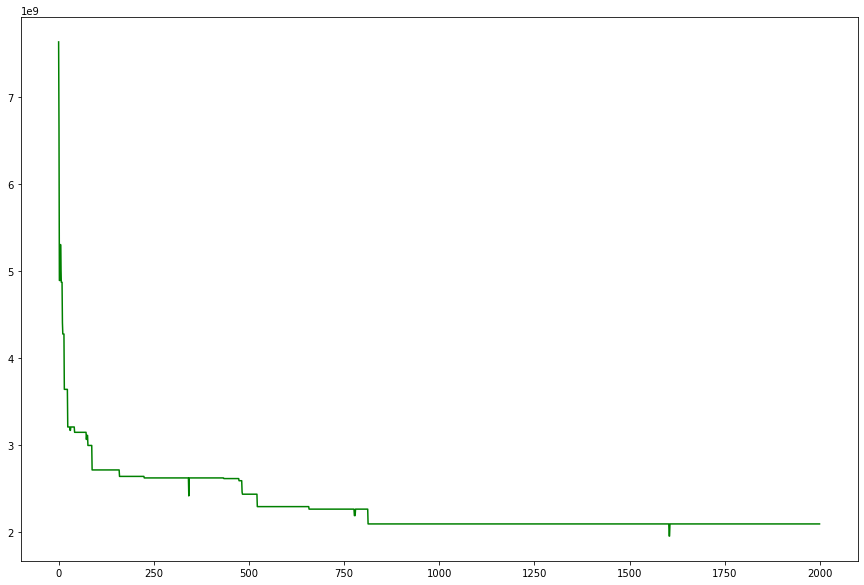

In [51]:
plt.rcParams['figure.figsize'] = [15,10];
plt.plot(range(0, gen), allbest, c="green")

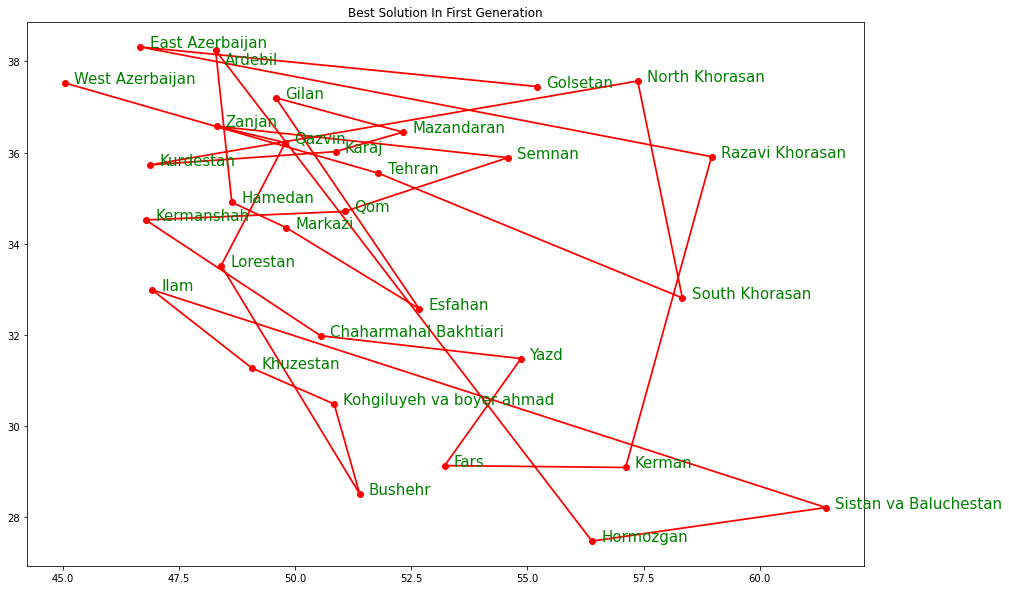

In [52]:
plt.rcParams['figure.figsize'] = [15,10];

string = [(name[i]) for i in range(len(cities))]
for i in range(len(cityCoordinates)):
    plt.plot(citylat[i,1],citylat[i,0], 'ro')
    if i == 0:
        plt.text(citylat[i,1]+0.2 , citylat[i,0]-0.3 ,
                string[np.where(citylat == citylat[i,0])[0][0]], color="green", fontsize=15)
    else:
        plt.text(citylat[i,1]+0.2 , citylat[i,0] ,
                string[np.where(citylat == citylat[i,0])[0][0]], color="green", fontsize=15)
    
xx = [citylat[i][0] for i in bestgen[1]]
yy = [citylat[i][1] for i in bestgen[1]]

plt.plot(yy, xx, color="red", linewidth=1.75, linestyle="-")
plt.title("Best Solution In First Generation")
plt.show()

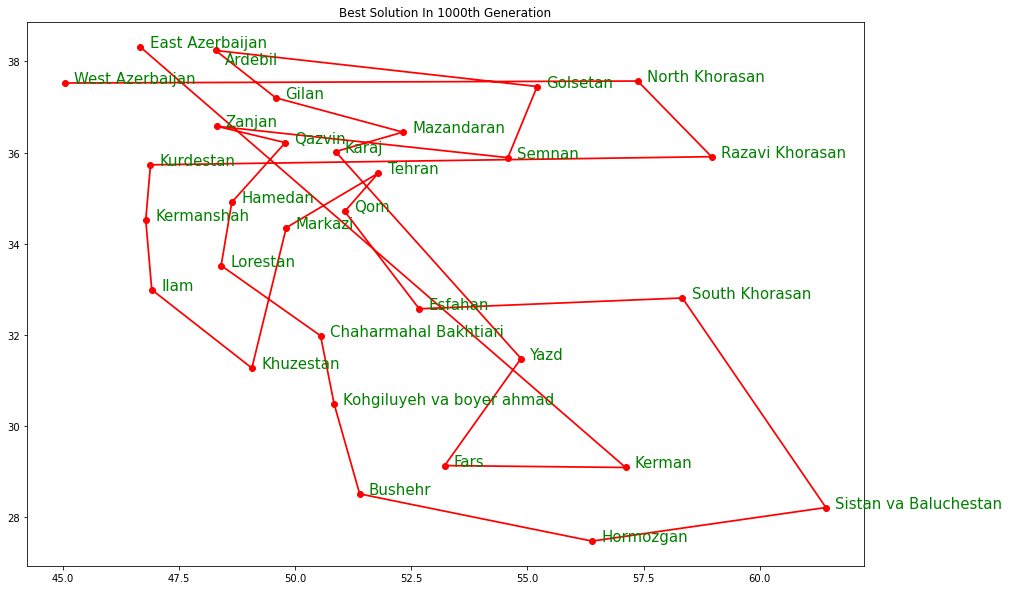

In [53]:
plt.rcParams['figure.figsize'] = [15,10];

string = [(name[i]) for i in range(len(cities))]
for i in range(len(cityCoordinates)):
    plt.plot(citylat[i,1],citylat[i,0], 'ro')
    if i == 0:
        plt.text(citylat[i,1]+0.2 , citylat[i,0]-0.3 ,
                string[np.where(citylat == citylat[i,0])[0][0]], color="green", fontsize=15)
    else:
        plt.text(citylat[i,1]+0.2 , citylat[i,0] ,
                string[np.where(citylat == citylat[i,0])[0][0]], color="green", fontsize=15)
    
xx = [citylat[i][0] for i in bestgen[int(len(bestgen) / 2)]]
yy = [citylat[i][1] for i in bestgen[int(len(bestgen) / 2)]]

plt.plot(yy, xx, color="red", linewidth=1.75, linestyle="-")
plt.title("Best Solution In 1000th Generation")
plt.show()

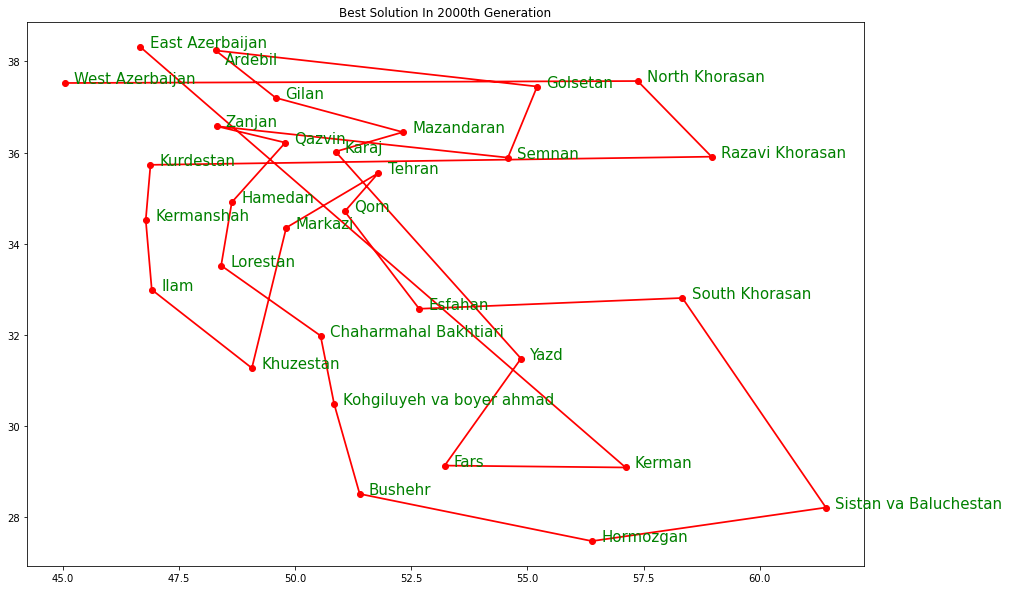

In [54]:
plt.rcParams['figure.figsize'] = [15,10];

string = [(name[i]) for i in range(len(cities))]
for i in range(len(cityCoordinates)):
    plt.plot(citylat[i,1],citylat[i,0], 'ro')
    if i == 0:
        plt.text(citylat[i,1]+0.2 , citylat[i,0]-0.3 ,
                string[np.where(citylat == citylat[i,0])[0][0]], color="green", fontsize=15)
    else:
        plt.text(citylat[i,1]+0.2 , citylat[i,0] ,
                string[np.where(citylat == citylat[i,0])[0][0]], color="green", fontsize=15)
    
xx = [citylat[i][0] for i in bestgen[-1]]
yy = [citylat[i][1] for i in bestgen[-1]]

plt.plot(yy, xx, color="red", linewidth=1.75, linestyle="-")
plt.title("Best Solution In 2000th Generation")
plt.show()